In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [5]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [27]:
df.drop('User ID', axis =1,  inplace= True )

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 positional arguments (and 2 keyword-only arguments) were given

In [29]:
df.drop('Gender', axis =1,  inplace= True )

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

In [33]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [39]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [41]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [43]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


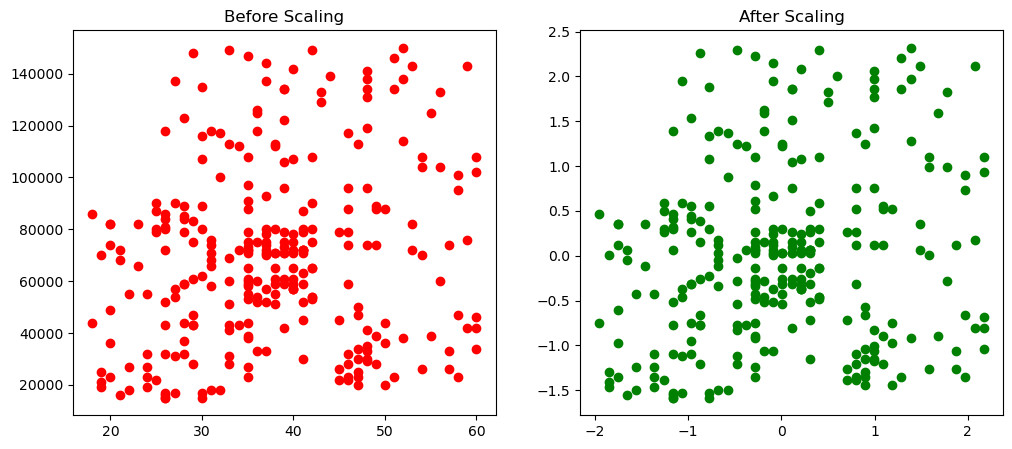

In [45]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'], color='red')
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='green')
ax2.set_title("After Scaling")
plt.show()

In [51]:
from sklearn.preprocessing import MinMaxScaler
norm_scaler = MinMaxScaler()

In [53]:
norm_scaler.fit(X_train)

MinMaxScaler()

In [55]:
X_train_normscaled = norm_scaler.transform(X_train)
X_test_normscaled = norm_scaler.transform(X_test)

In [57]:
X_train_normscaled = pd.DataFrame(X_train_normscaled, columns=X_train.columns)
X_test_normscaled = pd.DataFrame(X_test_normscaled, columns=X_test.columns)

In [59]:
X_train_normscaled

,Age,EstimatedSalary
0,0.190476,0.000000
1,1.000000,0.644444
2,0.476190,0.718519
3,0.523810,0.681481
4,0.571429,0.281481
...,...,...
275,0.714286,0.111111
276,0.261905,0.207407
277,0.428571,0.274074
278,0.214286,0.288889


In [61]:
X_train_normscaled.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,0.472959,0.405979
std,0.243290,0.256601
min,0.000000,0.000000
25%,0.285714,0.207407
50%,0.452381,0.411111
75%,0.666667,0.540741
max,1.000000,1.000000


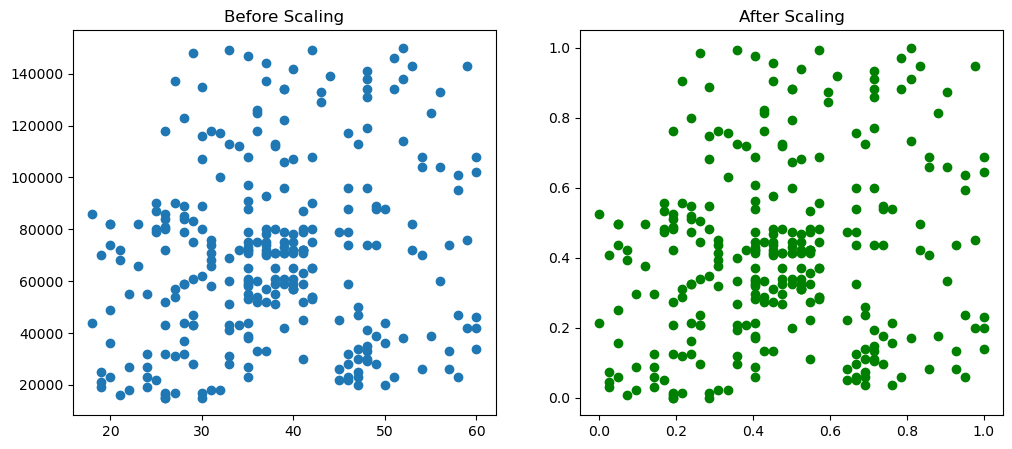

In [63]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_normscaled['Age'], X_train_normscaled['EstimatedSalary'],color='green')
ax2.set_title("After Scaling")
plt.show()

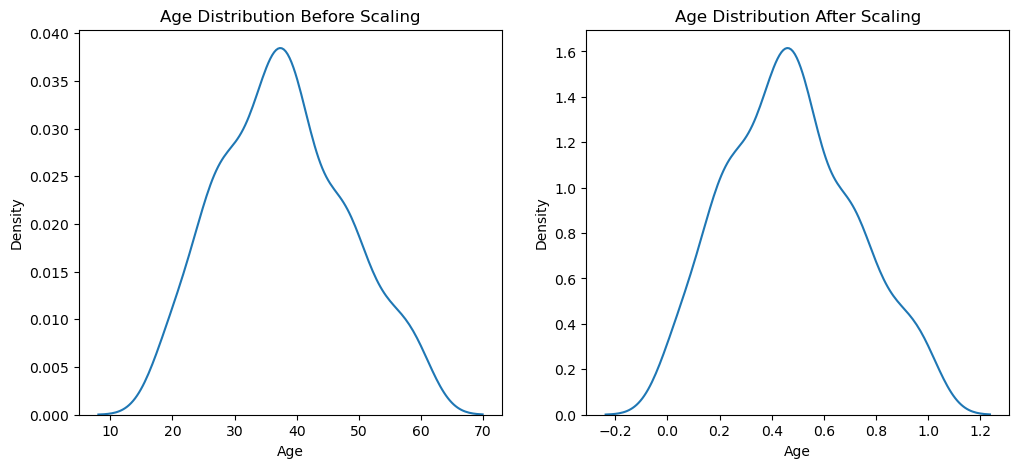

In [71]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize= (12,5))

ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(X_train_normscaled['Age'], ax=ax2)
plt.show()